# 디지털신호처리 (DSP) HW08
#### 이름 : 이연우
#### 학번 : 201810793
#### 학과 : 휴먼지능정보공학과

In [1]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate, read_wave, Wave

### - Chapter 10, Exercise 10.2 
The Open AIR library provides a “centralized... on-line resource for anyone interested in auralization and acoustical impulse response data” (http://www.openairlib.net). Browse their collection of impulse response data and download one that sounds interesting. Find a short recording that has the same sample rate as the impulse response you downloaded.

Simulate the sound of your recording in the space where the impulse response was measured, computed two way: by convolving the recording with the impulse response and by computing the filter that corresponds to the impulse response and multiplying by the DFT of the recording

### - Impurse Response Data

In [3]:
if not os.path.exists('HW08_mono.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/HW08_mono.wav

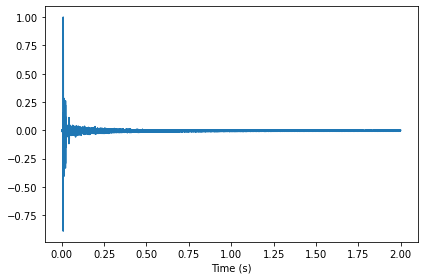

In [4]:
response = read_wave('HW08_mono.wav')

start = 0
duration = 2
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

##### - 오디오 들어보기

In [5]:
response.make_audio()

##### - DFT

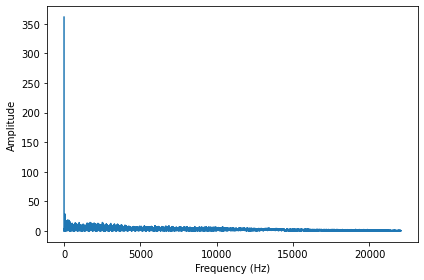

In [6]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

##### - Log-log Scale

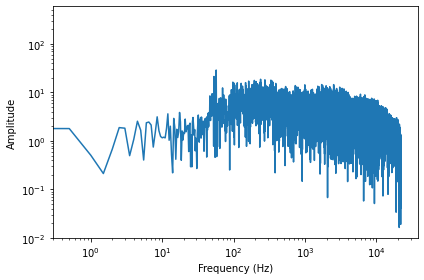

In [7]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude',
         xscale='log', yscale='log')

### - 바이올린 소리를 위와 같은 room에서 녹음 했을 때의 출력 결과
##### - 오리지널 바이올린 소리

In [8]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

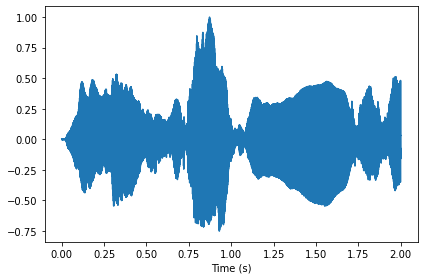

In [9]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

##### - 바이올린 오디오 듣기

In [10]:
violin.make_audio()

##### - 바이올린 DFT

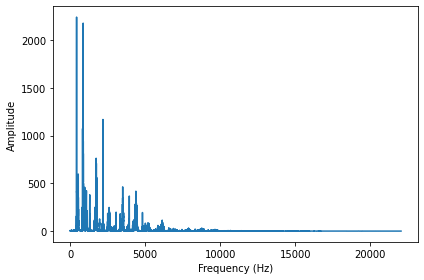

In [11]:
spectrum = violin.make_spectrum() 
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

##### 바이올린과 Impulse response의 길이를 같게 만들기.

In [12]:
spectrum.fs # 바이올린

array([0.00000e+00, 5.00000e-01, 1.00000e+00, ..., 2.20490e+04,
       2.20495e+04, 2.20500e+04])

In [13]:
transfer.fs # Impulse Resoponse

array([0.00000e+00, 5.00000e-01, 1.00000e+00, ..., 2.20490e+04,
       2.20495e+04, 2.20500e+04])

In [14]:
len(spectrum.hs), len(transfer.hs)

(44101, 44101)

#### - Frequency domain와 Time domain의 곱으로 오디오 변환

In [15]:
output = (spectrum * transfer).make_wave()
output.normalize()

#### - 오리지널 바이올린의 wave 형태와 오디오 변환후의 wave
오리지널 바이올린 wave

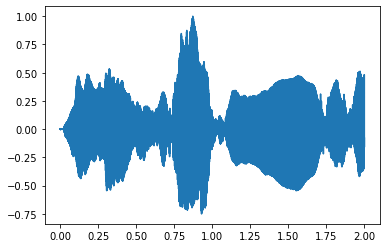

In [16]:
violin.plot()

오디오 변환 후 wave

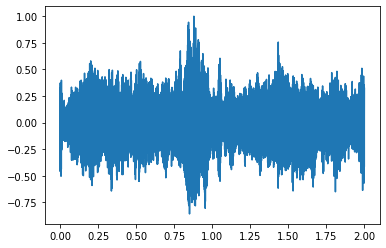

In [17]:
output.plot()

### - 오디오 변환 결과
- 오리지널 바이올린 소리

In [18]:
violin.make_audio()

- Frequency domain와 Time domain의 곱으로 오디오 변환한 바이올린 소리

In [19]:
output.make_audio()

- Convolution 했을 때 바이올린 소리

In [20]:
convolved = violin.convolve(response)
convolved.normalize()
convolved.make_audio()

Frequency domain와 Time domain의 곱과 Convolution을 했을 때의 결과가 같이 나온다는 것을 알 수 있다.